# <font color='#eb3483'> Introduction to Pandas </font>

Pandas is numpy's extension for Data Analysis. Generally speaking, pandas provides the data structure `DataFrame`. A `pandas.Dataframe` is basically a table similar to a excel spreadsheet, that has columns and rows.   

http://pandas.pydata.org/

The standard way of importing pandas is:

##  <font color='#eb3483'> 0. Import Packages </font>

In [ ]:
import pandas as pd

In this notebook we will cover:
<font color='#eb3483'>
1. Dataframes
1. Reading and writing a data frame
1. Inspecting a data frame
1. Indexing 

    </font>


##  <font color='#eb3483'> 1. Building DataFrames </font>

There are many ways to create a dataframe

In [ ]:
#We can feed in a 2D list and specify column names - and make the data frame with the function DataFrame()
rick_morty = pd.DataFrame(
    [
        ["Rick", "Sanchez", 60],
        ["Morty", "Smith", 14]
    ], columns = ["first_name", "last_name", "age"]
)
rick_morty

In [ ]:
type(rick_morty)

In [ ]:
#We can take a peak of our dataframe using the built-in head method .head()

#^^^

We can create an empty dataframe

In [ ]:
df3 = pd.DataFrame()

In [ ]:
#It's as you would expect ... empty
df3

Now lets add columns to the empty dataframe

In [ ]:
df3['teaching_team'] = ["Taryn", "Nii", "Tlholo"]

In [ ]:
df3

In [ ]:
#guess our age (guess carefully...)
#assign it to column 'age' in df3


In [ ]:
df3

We can see the column names with `.columns`

In [ ]:
df3.columns

We can see the values of a column

In [ ]:
df3['teaching_team']

We can also sort our dataframe by our columns

How do we get help ... lets try a few things

In [ ]:
#Let's get some help
df3.sort_values?

In [ ]:
#Let's sort by name
df3.sort_values(by="teaching_team")

In [ ]:
#Try and sort by age 


#How can we change this to descending?

Selecting a column that does not exists will raise a `KeyError` (same error as when selecting a missing key in a dictionary)

In [ ]:
df3["address"]

## <font color='#eb3483'> 2. Reading/Writing data with dataframes </font>

It's not very often we have to create our own data frame but now we know just incase.   
Pandas can import from and export to many types of files, csv, json, excel among others.

For example, we can read a csv including information about the Avengers (taken from [here](https://github.com/fivethirtyeight/data/tree/master/avengers))

In [ ]:
avengers = pd.read_csv("data/avengers.csv")

In [ ]:
# look at the head of our data set



We can save the dataframe back to a csv file with `to_csv` (this method writes the index by default as a separate column, we can avoid this by passing the argument `index=False`).

In [ ]:
avengers.to_csv("avengers2.csv")

or we can export to excel using `to_excel` (it requires a separate package, `xlwt`)

In [ ]:
avengers.to_excel("avengers.xls")

Likewise we can read from a excel file easily (this requires the package `xlrd`)

In [ ]:
avengers_reloaded = pd.read_excel("avengers.xls")

In [ ]:
avengers_reloaded.head()

Bothered by that extra 'Unnamed:0' column? It's the index column, which was created when you read in the data the first time. To avoid saving this column, use `index=False` when saving: `avengers.to_csv("avengers2.csv", index=False)`.

## <font color='#eb3483'> 3. Inspecting a dataframe </font>

Once we read in a data frame - we generally have a quick look around (just as you would do in excel).
 



We can see the first rows of a dataframe with `head()`

In [ ]:
avengers.head()

and the last ones with tail()

In [ ]:
avengers.tail()

We can see the size of a dataframe (n_rows, n_columns) with `shape`

In [ ]:
avengers.shape

We can see the data type of each column with `dtypes`

We can look at the column names using `.columns`

We can use `.describe()` to find statistical information about the dataframe's columns.

<hr>

## <font color='#eb3483'> 4. Appending Dataframes </font>

We may have data sets that we want to add together by rows   
e.g. batches of data by month, or different countries etc.

<div>
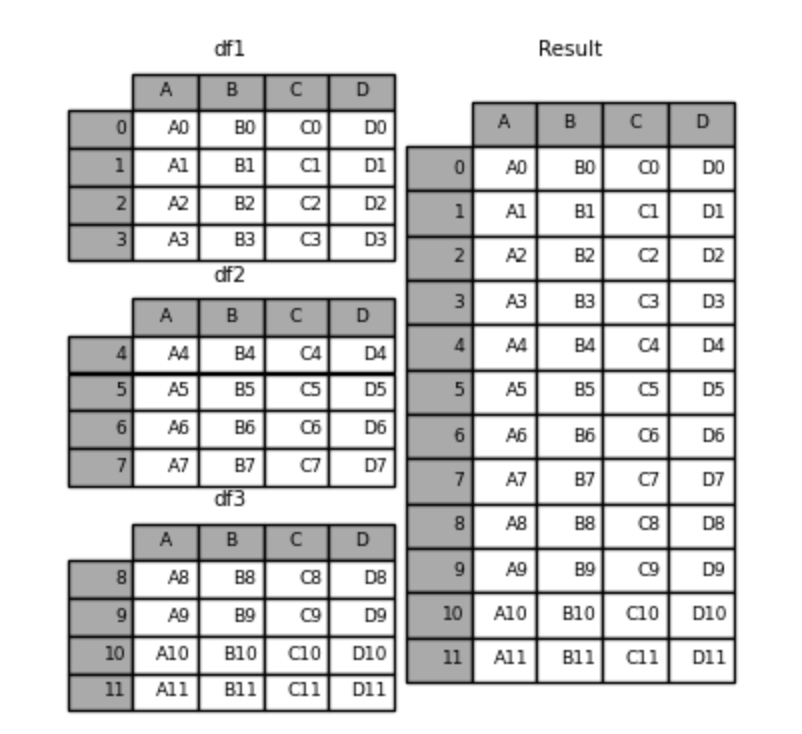
</div>

For this there are two ways:   
Concatenate (default axis = 0 for row concatenation): `pd.concat([df1, df2])`   
OR   
append: you can simply call `df1.append(df2)`

In [ ]:
#Excercise - read in csv of listings_ireland.csv and listings_scotland.csv airbnb listings and check shape

In [ ]:
ireland = 


In [ ]:
scotland = 


In [ ]:
#join the two data frames together using concat and check shape

In [ ]:
joined = 

In [ ]:
#join the two data frames together using append and check the shape

In [ ]:
joined2 = 

<hr>

## <font color='#eb3483'> 5. Merging Data frames </font>

Very often we may have a few different data sets related to the same topic that we want to combine.   

To be able to combine these. They must have a column in common (note sometimes the data is common but the column name has been erroneously mislabelled and you would need to correct it before merging).

*An example is maybe your college has a data set of class attandance per student and a data set of their grades.   
They want to see if class attendance is correlated to your grade.
They would need to join the two data sets together using the student name (or more often a student ID).*


<div>
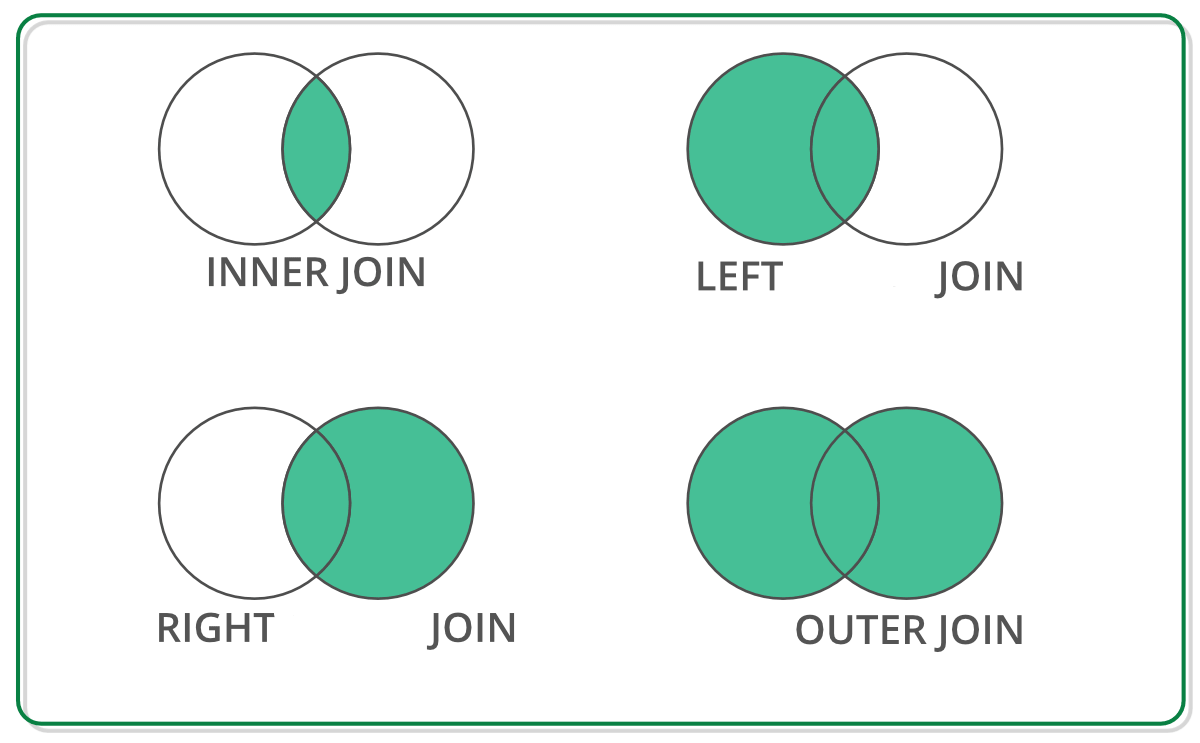
</div>

`merge()`: To combine the datasets on common column or index or both.   
`concat()`: To combine the datasets across rows or columns.   
`join()`: To combine the datasets on key column or index.

In [ ]:
#Excercise - read in ny_airbnb_listing_info.csv and check shape
ny_listings = avengers = pd.read_csv("data/ny_airbnb_listing_info_s.csv")
print(ny_listings.shape)
ny_listings.head()

In [ ]:
#Excercise - read in ny_airbnb_location.csv and check shape
ny_locations = pd.read_csv("data/ny_airbnb_location_s.csv")
print(ny_locations.shape)
ny_locations.head()

In [ ]:
# Step 1: lets join the listings and location together to get a complete set of listings data
all_listings = pd.merge(ny_listings, ny_locations, on = "id", how='left')

In [ ]:
print(all_listings.shape)
all_listings.head(11)

In [ ]:
#since we only have 10 items and they are the exact same between coloumns it wouldnt matter if we joined
#by left, right, inner, or outer. But in some instances you would need to decide
#which is appropriate depending on what you are trying to achieve
#tip - always check its done what you want it to do!


In [ ]:
#Excercise - read in ny_airbnb_reviews.csv and check shape
ny_reviews = pd.read_csv("data/ny_airbnb_reviews.csv")
print(ny_reviews.shape)
ny_reviews.head()

In [ ]:
#Let's get reviews for the 10 listings we have. 
pd.merge(all_listings, ny_reviews, on="id", how='left')


In [ ]:
#exercise - try and merge on right, inner, outer - see how it differs.

Read [this](https://towardsdatascience.com/python-pandas-tricks-3-best-methods-4a909843f5bc) helpful article on the difference between left, right, inner and outer joining with an example. 